In [12]:
import numpy as np
from scipy import stats

import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import time
from tqdm import tqdm

plt.rc('font', family='sans-serif', size=14)

mp.rc('text')
mp.rc('font', family='sans-serif')
mp.rc('legend', fontsize=12)
#rc('text', usetex=True)

# sns.set_context('notebook', font_scale=1)
# sns.set_style('whitegrid')
# sns.set_palette('copper_r')


# Stimulus discrimination problem

## Single choice task

### Task definition

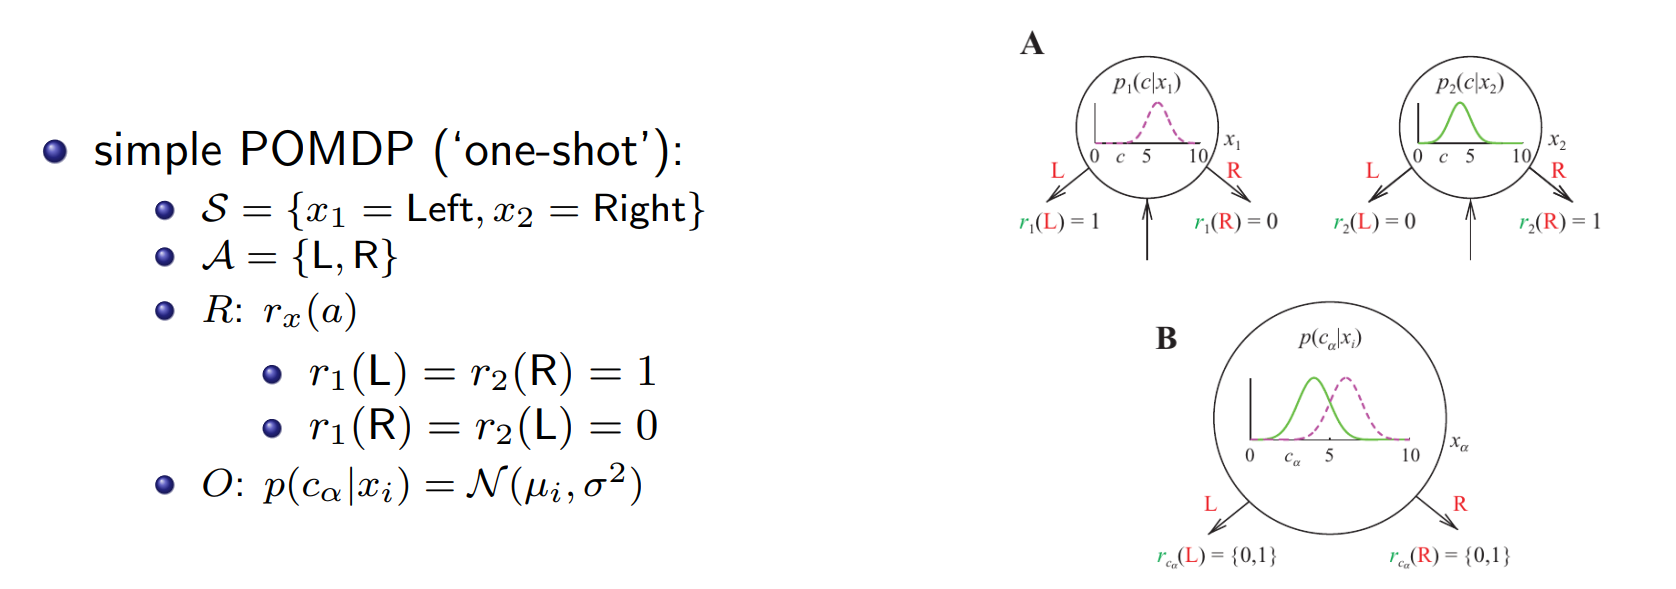

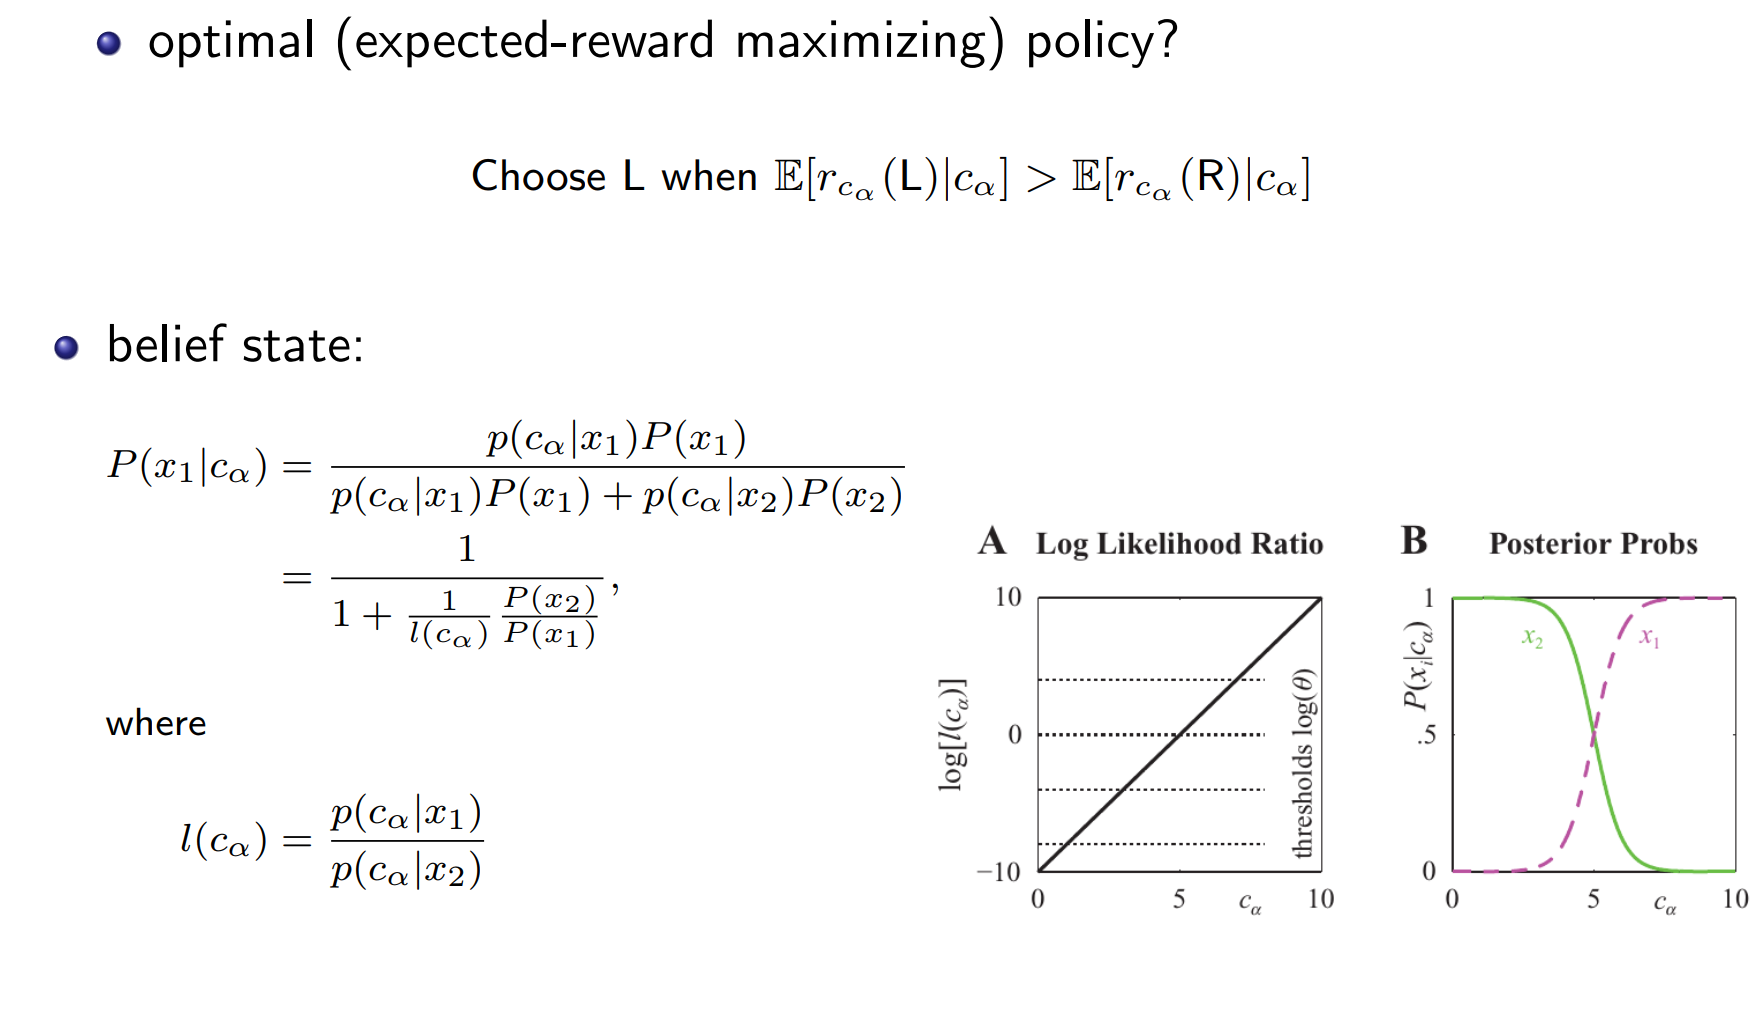

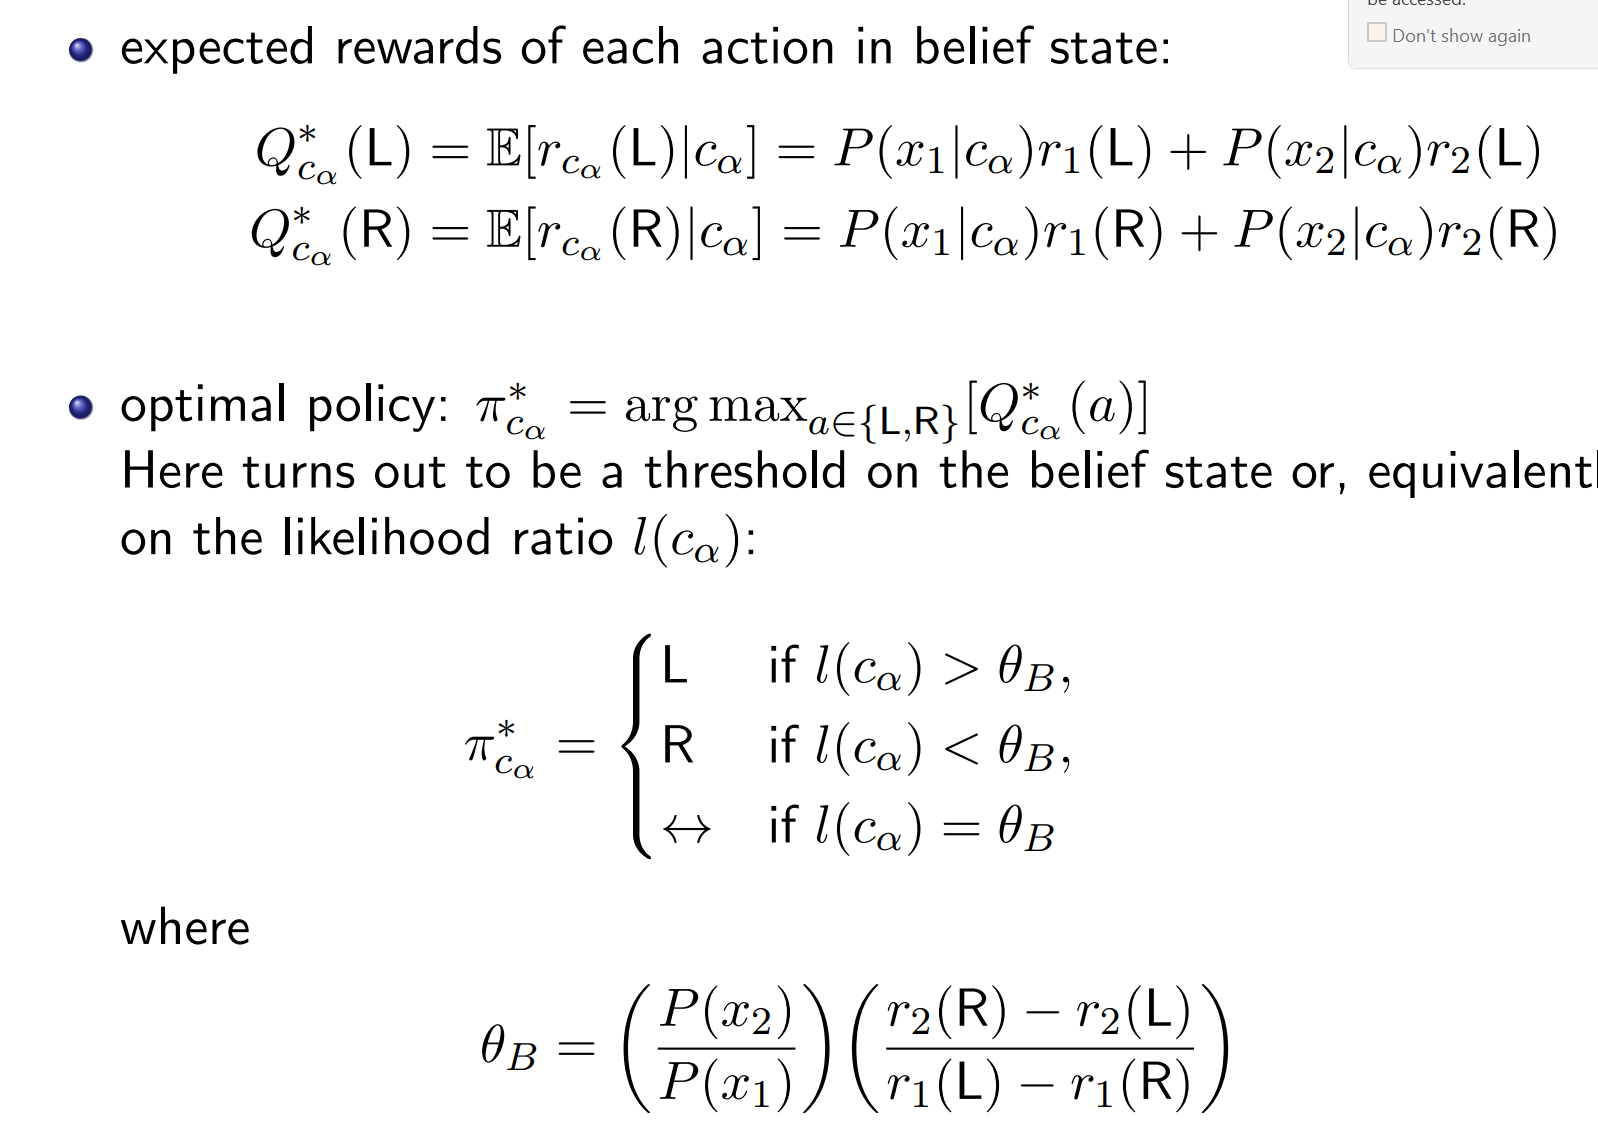

## Sequential choice task

### Task definition

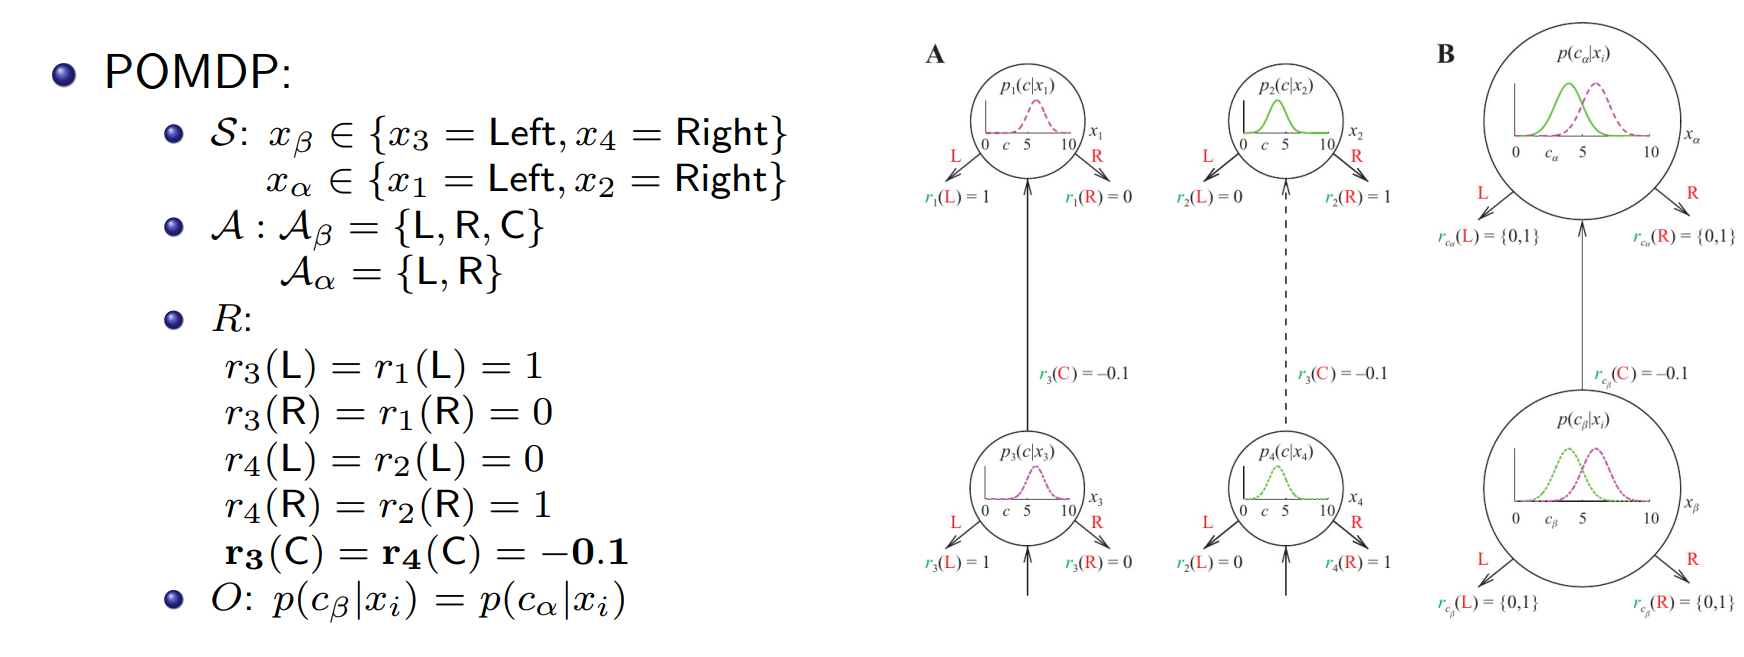

# Figures to replicate

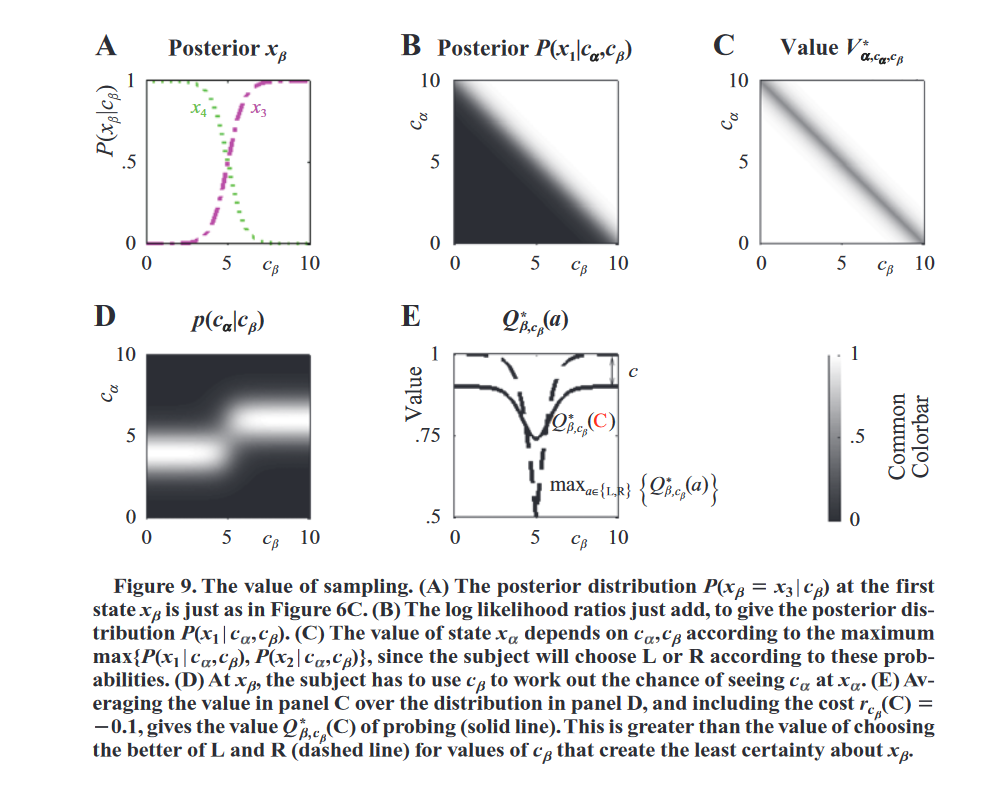

## Figure 9A - Posterior belief state

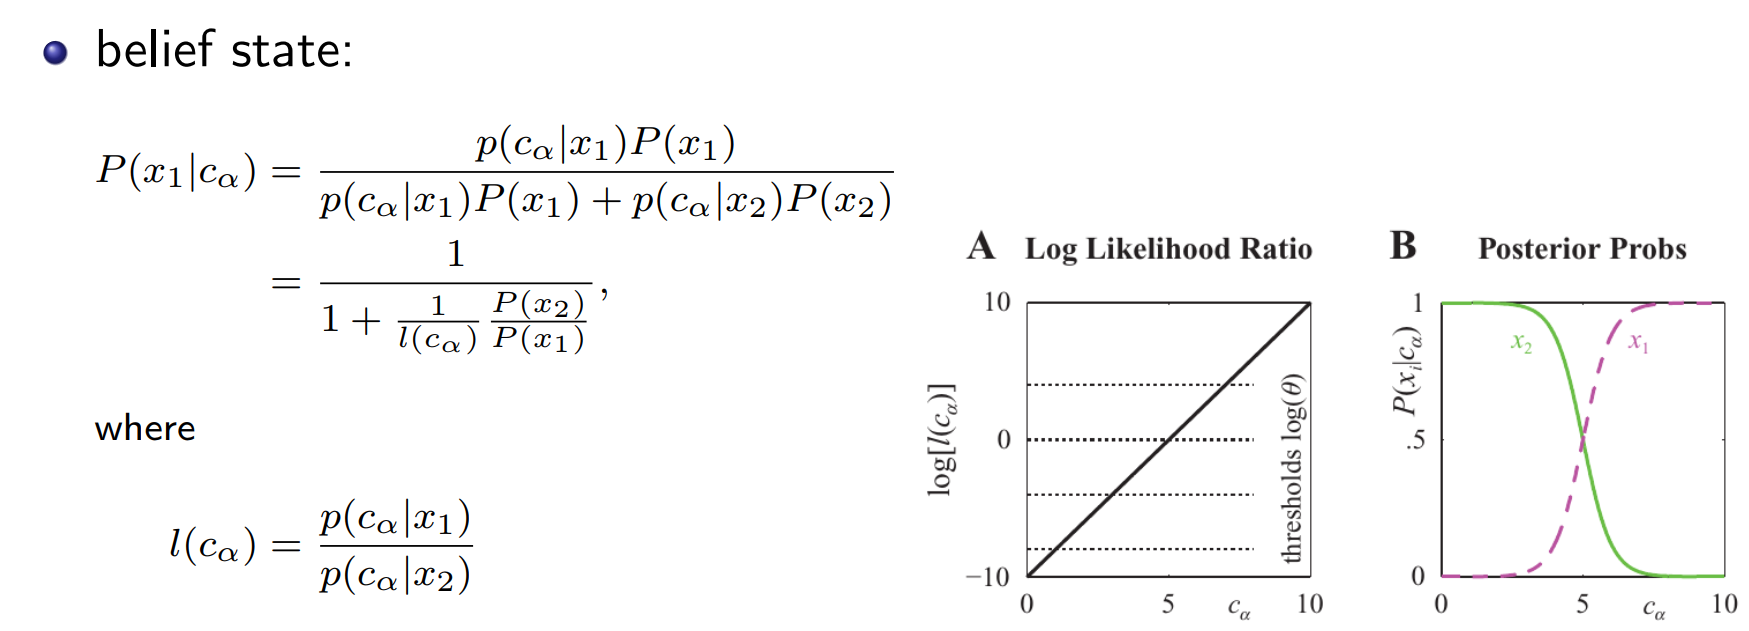

In [207]:
# parameter for state-priors
p_left = 0.5

# parameters of observation likelihoods
mu_left = 6
mu_right = 4
mu1, mu2 = mu_left, mu_right
sigma = 1

In [208]:
# likelihood: model of observation given state
likelihood_x3 = stats.norm(loc=mu1, scale=sigma).pdf # P(c_beta | x3) - Probability of observation if stimulus is going to the left
likelihood_x4 = stats.norm(loc=mu2, scale=sigma).pdf # P(c_beta | x4) - ... to the right.    || for state x_beta (first step)

# prior probabilities of states: experimental setting
prior_x3 = p_left
prior_x4 = 1 - p_left

# funcs to calculate posterior in state beta (function of c_beta)
# posterior ~ likelihood(c_beta) * prior / normalization(c_beta)
posterior_x3 = lambda c: likelihood_x3(c) * prior_x3 / (likelihood_x3(c) * prior_x3 + likelihood_x4(c) * prior_x4)
posterior_x4 = lambda c: likelihood_x4(c) * prior_x4 / (likelihood_x3(c) * prior_x3 + likelihood_x4(c) * prior_x4)

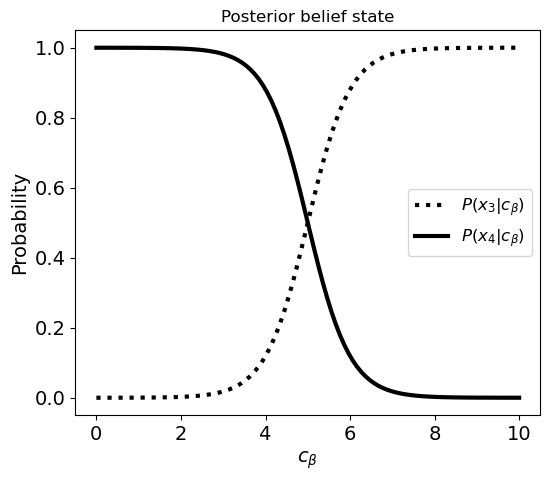

In [209]:
c = np.linspace(0, 10, 100)

plt.figure(figsize=(6, 5))
plt.title(r"Posterior belief state", fontsize=12)
plt.plot(c, posterior_x3(c), color='black', linewidth=3, linestyle=':', label=r"$P(x_3 | c_\beta)$")
plt.plot(c, posterior_x4(c), color='black', linewidth=3, linestyle='-', label=r"$P(x_4 | c_\beta)$")
plt.legend()
plt.xlabel(r"$c_\beta$")
plt.ylabel("Probability")
plt.savefig("./im/Figure_9A.png", dpi=200, bbox_inches='tight')

## Figure 9B - Posterior given two observations

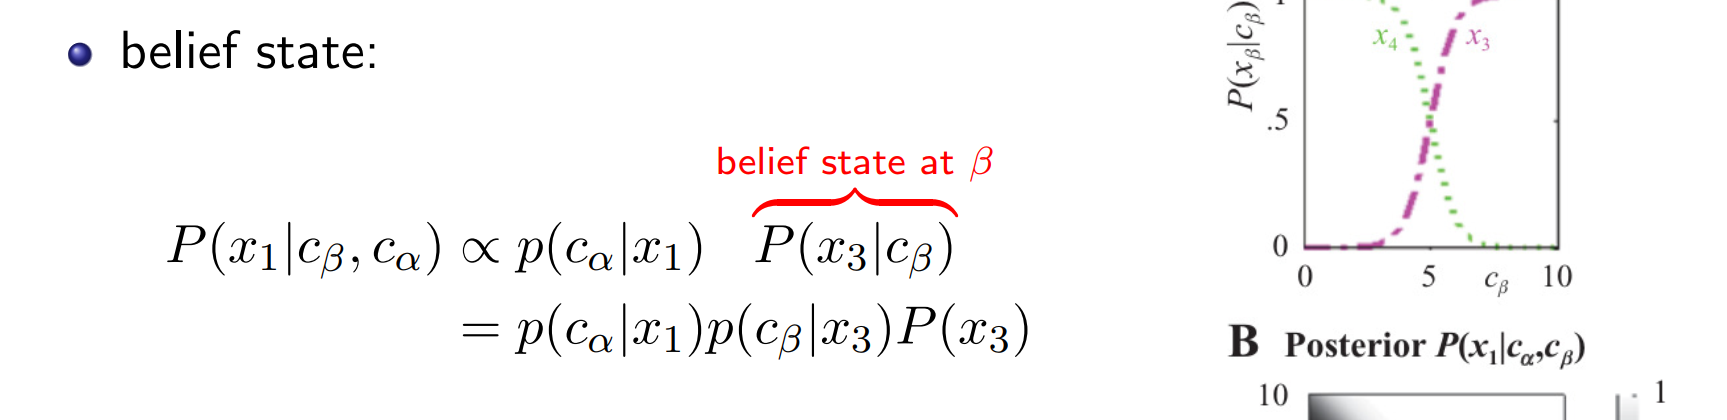

Posterior given two observations is given by the formula

$$ P(x_1 | c_{\beta}, c_{\alpha}) \propto p(c_{\alpha} | x_1) * p(x_3 | c_{\beta}) $$

- The second term is posterior for the first choice. It is a function of $c_\beta$ - for every $c_\beta$ we would know the posterior probability of a real state $x_\beta$

- The first term is again a likelihood of observation given the state. It is also a function of observation, but this time of $c_\alpha$. 

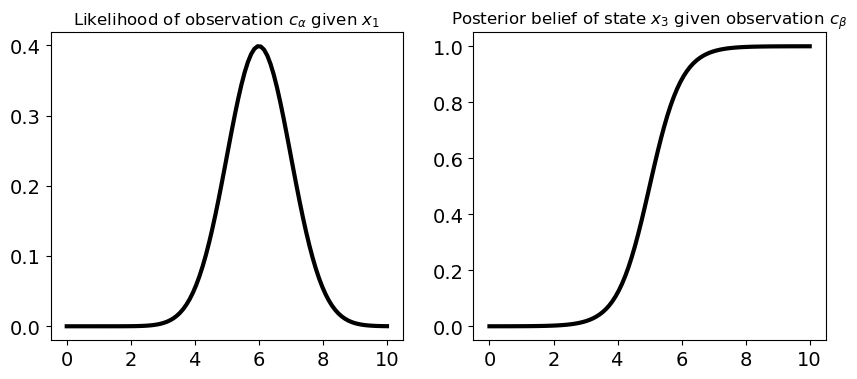

In [210]:
# visualize how these multiplication terms for posterior look like

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title(r"Likelihood of observation $c_\alpha$ given $x_1$", fontsize=12)
plt.plot(c, likelihood_x1(c), color='black', linewidth=3)


plt.subplot(1, 2, 2)
plt.title(r"Posterior belief of state $x_3$ given observation $c_\beta$", fontsize=12)
plt.plot(c, posterior_x3(c), color='black', linewidth=3)

In [211]:
%%time
likelihood_x1 = stats.norm(loc=mu1, scale=sigma).pdf # P(c_beta | x1) - Probability of observation if stimulus is going to the left
likelihood_x2 = stats.norm(loc=mu2, scale=sigma).pdf # P(c_beta | x2) - ... to the right.    || for state x_alpha (second step)

# funcs for calculating posteriors without normalization
post_x1_func = lambda c_alpha, c_beta: likelihood_x1(c[alpha]) * posterior_x3(c[beta])
post_x2_func = lambda c_alpha, c_beta: likelihood_x2(c[alpha]) * posterior_x4(c[beta])

c = np.linspace(0, 10, 100)

posterior_x1_array = np.zeros((len(c), len(c)), dtype=np.float64)
posterior_x2_array = np.zeros((len(c), len(c)), dtype=np.float64)

for alpha in tqdm(range(len(c)), desc='calculating posteriors: '):
    for beta in range(len(c)):
        
        # post_x1 = p(c_alpha | x1) * P(x3 | c_beta) = likelihood * posterior from step beta
        post_x1 = post_x1_func(c[alpha], c[beta])
        post_x2 = post_x2_func(c[alpha], c[beta])
        
        # norm_factor IS IMPORTANT, would not work without it properly!!!
        # norm_factor is actually  a function of c_alpha and c_beta 
        # and is different for different c_alpha and c_beta
        norm_factor = post_x1 + post_x2
        
        posterior_x1_array[alpha, beta] = post_x1 / norm_factor
        posterior_x2_array[alpha, beta] = post_x2 / norm_factor

calculating posteriors: 100%|████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.46it/s]

CPU times: total: 6.97 s
Wall time: 6.92 s


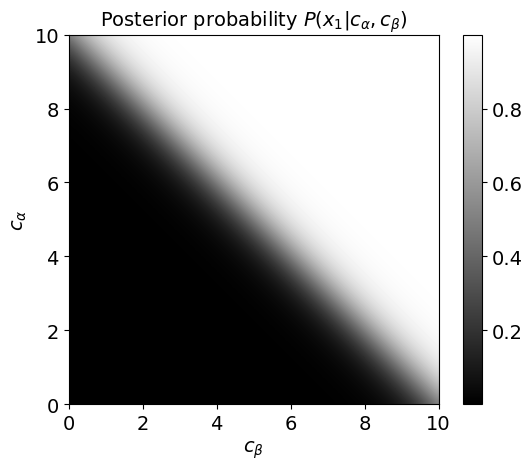

In [212]:
plt.title(r"Posterior probability $P(x_1 | c_\alpha, c_\beta)$", fontsize=14)
plt.imshow(posterior_x1_array, origin='lower', cmap='gray', extent=[c[0], c[-1], c[0], c[-1]], interpolation='bicubic')
clb = plt.colorbar()
#clb.ax.set_title("Probability", fontsize=8)
plt.xlabel(r"$c_\beta$")
plt.ylabel(r"$c_\alpha$")
plt.savefig("./im/Figure_9B.png", dpi=200, bbox_inches='tight')
plt.show()


## Figure 9C - Value of a state alpha given both observations

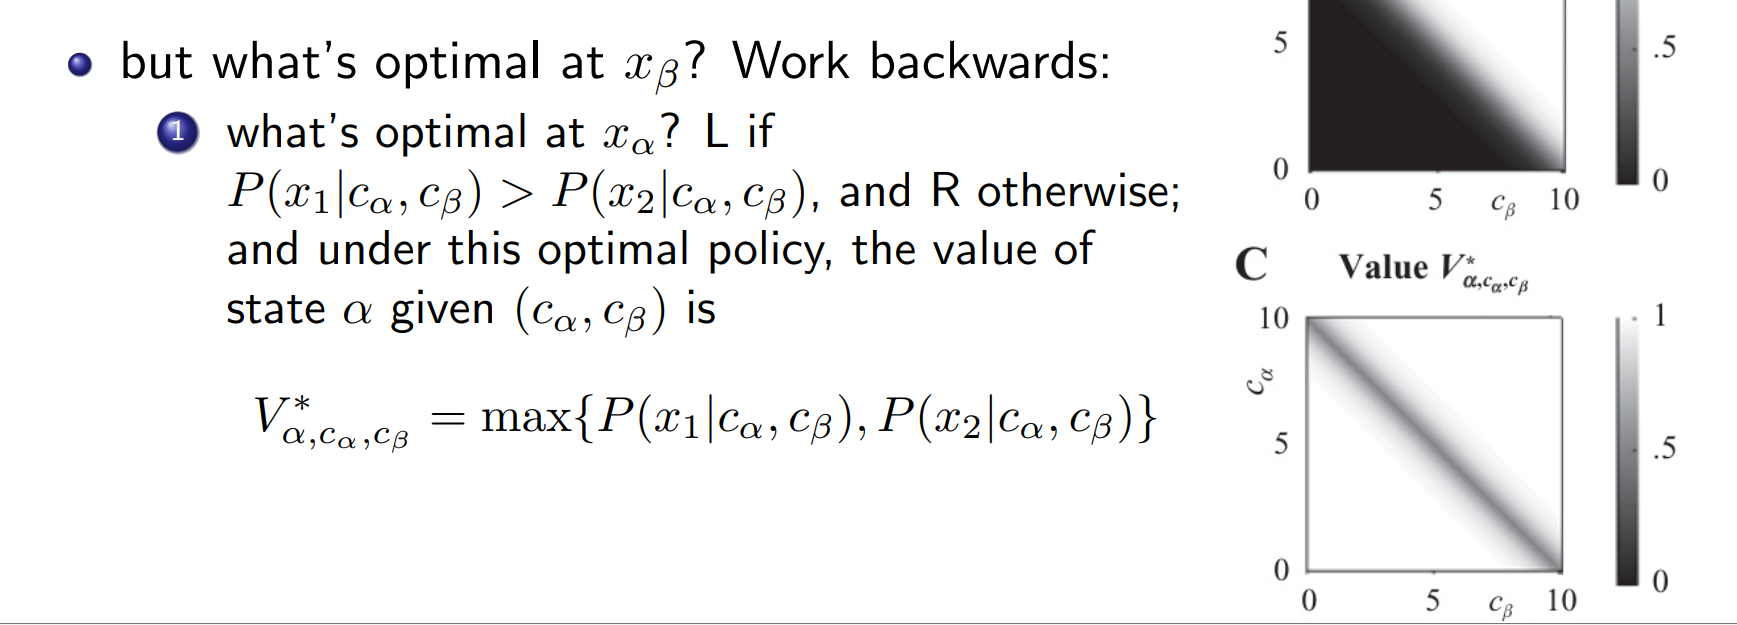

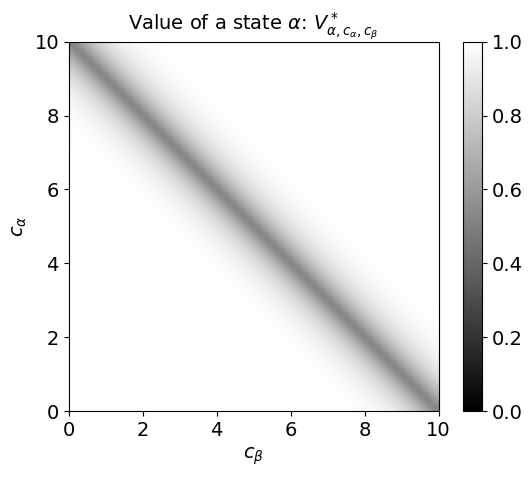

In [213]:
# value of state alpha given c_alpha and c_beta
v_alpha = np.max(np.stack((posterior_x1_array, posterior_x2_array)), axis=0)
plt.title(r"Value of a state $\alpha$: $V^*_{\alpha, c_\alpha, c_\beta}$", fontsize=14)
plt.imshow(v_alpha, origin='lower', vmin=0, vmax=1, cmap='gray', extent=[c[0], c[-1], c[0], c[-1]], interpolation='bicubic')
clb = plt.colorbar()
#clb.ax.set_title("Probability", fontsize=8)
plt.xlabel(r"$c_\beta$")
plt.ylabel(r"$c_\alpha$")
plt.savefig("./im/Figure_9C.png", dpi=200, bbox_inches='tight')
plt.show()

## Figure 9D - Conditional distribution p(c_alpha | c_beta)

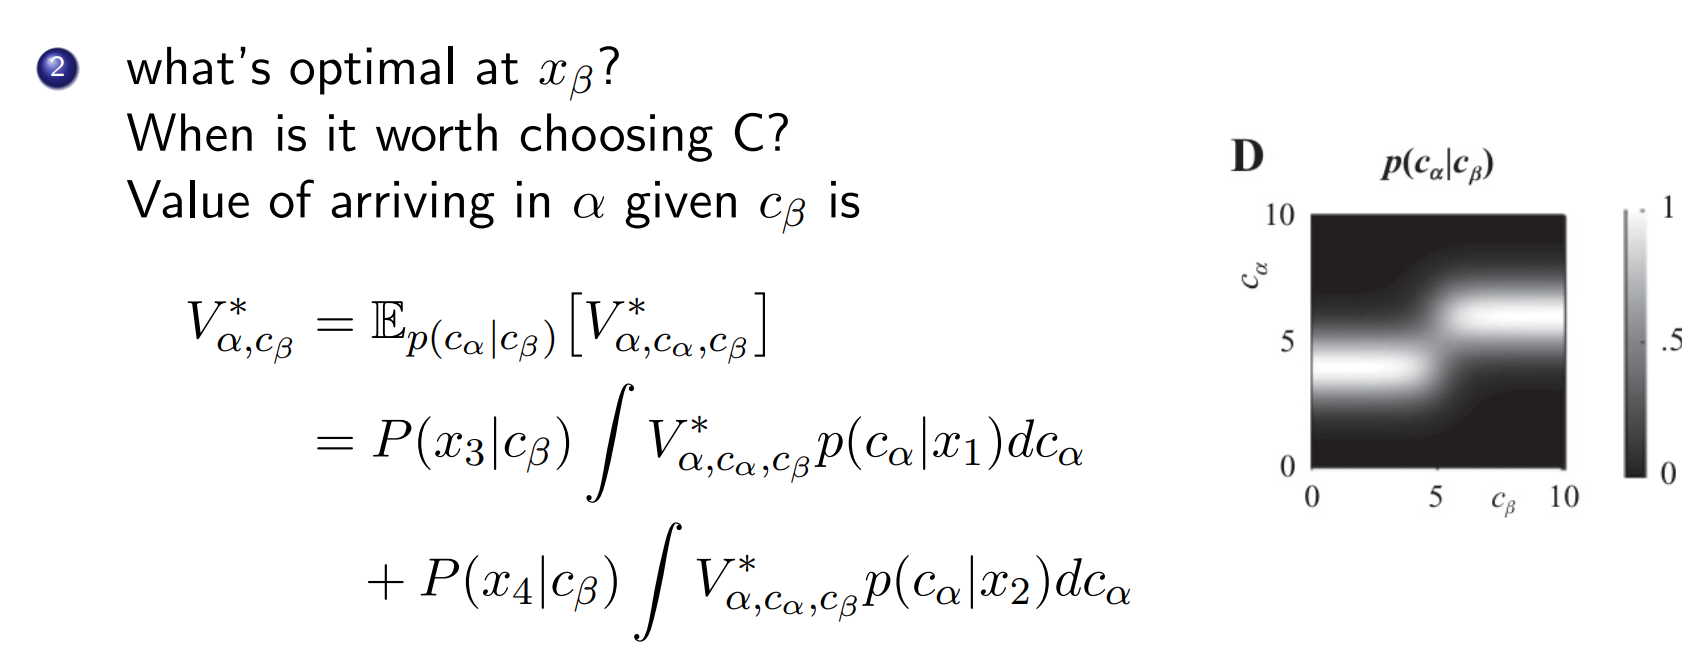

How do we construct $p(c_\alpha | c_\beta)$? We know $p(c_\alpha | x_1)$

In [219]:
%%time
p_ca_cb = np.zeros((len(c), len(c)))

for alpha in tqdm(range(len(c)), desc='calculating conditional distribution of observations: '):
    for beta in range(len(c)):
        p_ca_cb[alpha, beta] = posterior_x3(c[beta]) * likelihood_x1(c[alpha]) + posterior_x4(c[beta]) * likelihood_x2(c[alpha])

calculating conditional distribution of observations: 100%|██████████████████████████| 100/100 [00:06<00:00, 14.41it/s]

CPU times: total: 7.16 s
Wall time: 6.94 s


True
CPU times: total: 78.1 ms
Wall time: 54.3 ms


Text(0, 0.5, '$c_\\alpha$')

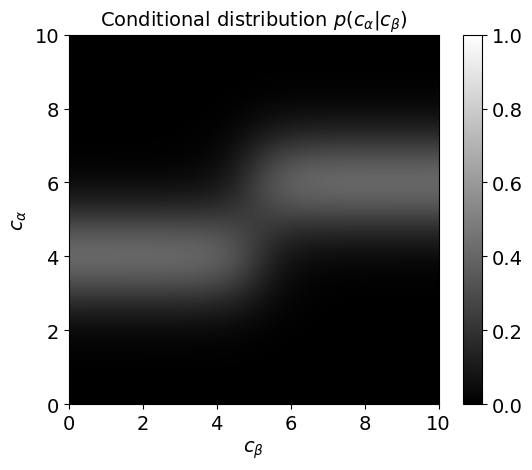

In [228]:
%%time
c_alphas, c_betas = np.meshgrid(c, c, indexing='ij')
p_ca_cb_new = posterior_x3(c_betas) * likelihood_x1(c_alphas) + posterior_x4(c_betas) * likelihood_x2(c_alphas)
print(np.all(p_ca_cb_new == p_ca_cb))

plt.title(r"Conditional distribution $p(c_\alpha | c_\beta)$", fontsize=14)
plt.imshow(p_ca_cb_new, origin='lower', cmap='gray', vmin=0, vmax=1, extent=[c[0], c[-1], c[0], c[-1]], interpolation='bicubic')
clb = plt.colorbar()
#clb.ax.set_title("Probability", fontsize=8)
plt.xlabel(r"$c_\beta$")
plt.ylabel(r"$c_\alpha$")

In [227]:
c_alphas

array([[ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
        10.       ],
       [ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
        10.       ],
       [ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
        10.       ],
       ...,
       [ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
        10.       ],
       [ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
        10.       ],
       [ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
        10.       ]])

In [225]:
c_betas

array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.1010101,  0.1010101,  0.1010101, ...,  0.1010101,  0.1010101,
         0.1010101],
       [ 0.2020202,  0.2020202,  0.2020202, ...,  0.2020202,  0.2020202,
         0.2020202],
       ...,
       [ 9.7979798,  9.7979798,  9.7979798, ...,  9.7979798,  9.7979798,
         9.7979798],
       [ 9.8989899,  9.8989899,  9.8989899, ...,  9.8989899,  9.8989899,
         9.8989899],
       [10.       , 10.       , 10.       , ..., 10.       , 10.       ,
        10.       ]])

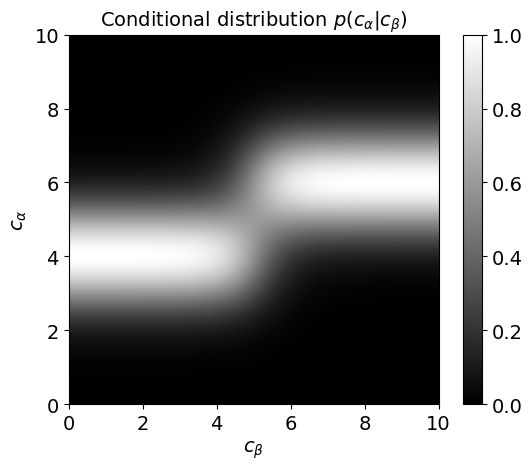

In [215]:
plt.title(r"Conditional distribution $p(c_\alpha | c_\beta)$", fontsize=14)
plt.imshow(p_ca_cb/np.max(p_ca_cb.flatten()), origin='lower', cmap='gray', vmin=0, vmax=1, extent=[c[0], c[-1], c[0], c[-1]], interpolation='bicubic')
clb = plt.colorbar()
#clb.ax.set_title("Probability", fontsize=8)
plt.xlabel(r"$c_\beta$")
plt.ylabel(r"$c_\alpha$")
plt.savefig("./im/Figure_9D.png", dpi=200, bbox_inches='tight')
plt.show()

## Figure 9E - Action value of choosing to make another observation

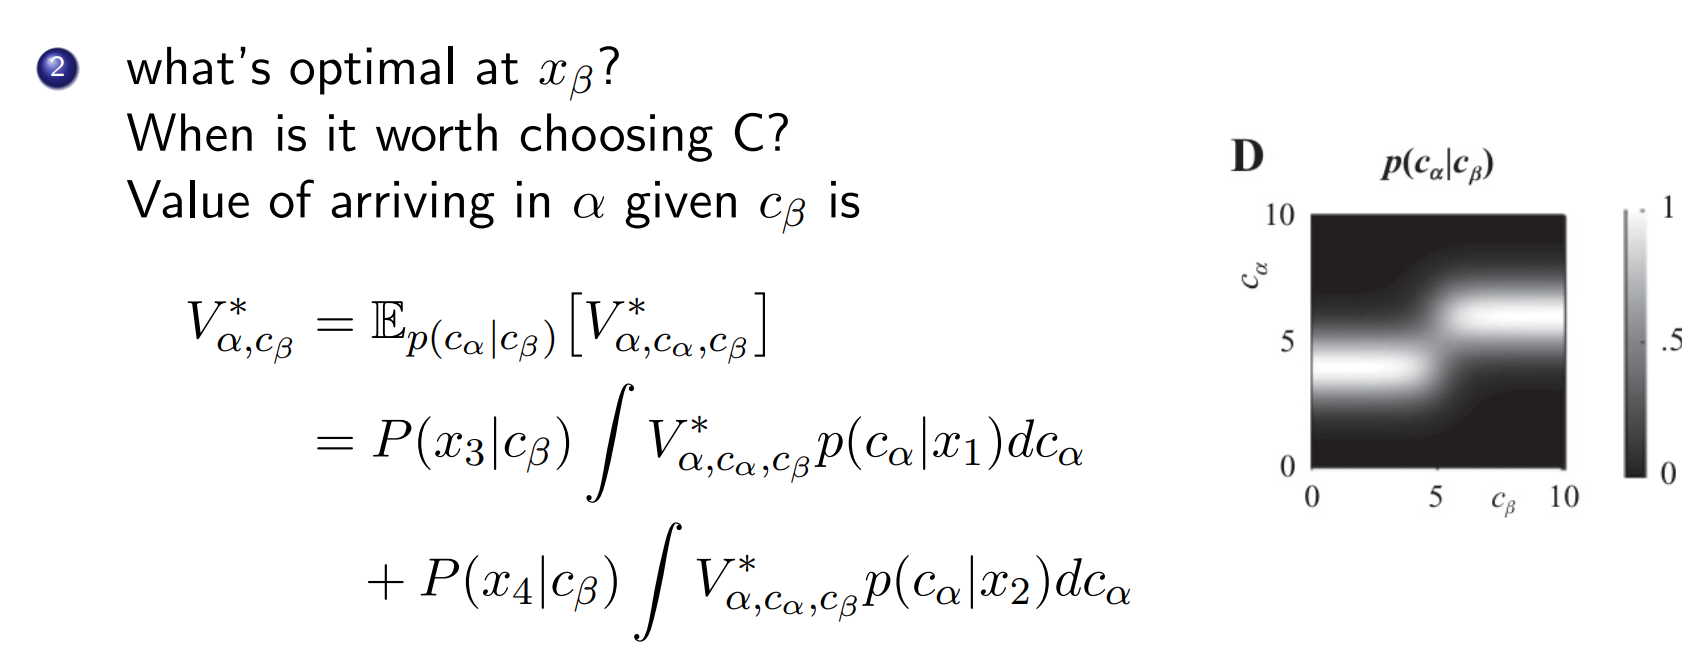

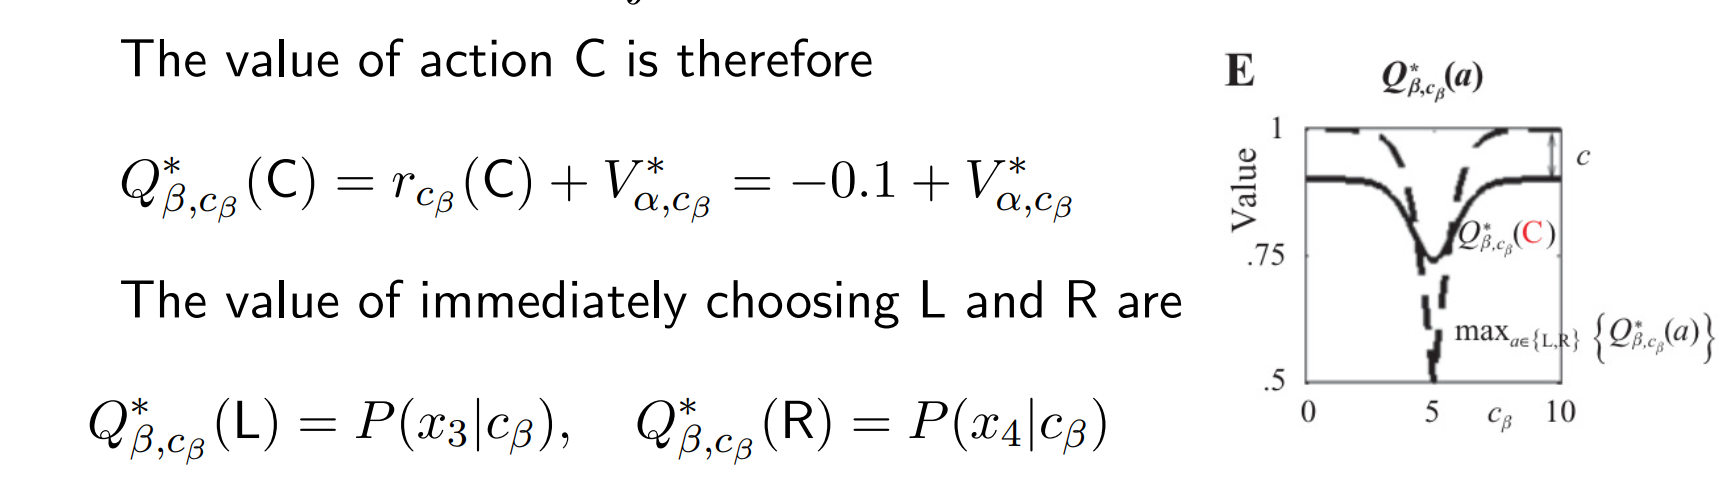

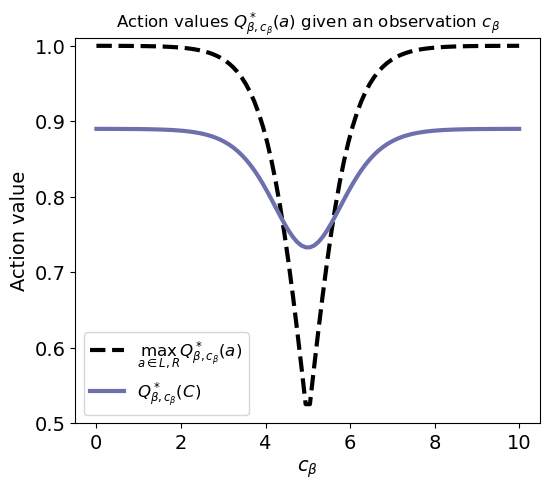

In [216]:
# value of arriving to alpha given c_beta - averaging over conditional distribution
# summation over "alpha" axis (axis=0) = intergral over c_alpha
# should leave us a function of c_beta
# dividing by intergration domain (b - a), which is np.max(c) - np.min(c) = 10 - 0 = 10
v = np.sum(v_alpha * p_ca_cb, axis=0) / np.max(c) 

# action values
q_center = -0.1 + v
q_left = posterior_x3(c)
q_right = posterior_x4(c)
q_lr_max = np.max(np.stack((q_left, q_right), axis=0), axis=0)

plt.figure(figsize=(6, 5))
plt.title(r"Action values $Q^*_{\beta, c_\beta} (a)$ given an observation $c_\beta$", fontsize=12)
plt.plot(c, q_lr_max, color='black', linewidth=3, linestyle='--', label=r"$\max_{a \in {L, R}} { Q^*_{\beta, c_\beta} (a) }$")
plt.plot(c, q_center, color='#6d70ad', linewidth=3, label=r"$Q^*_{\beta, c_\beta} (C)$")
plt.ylim((0.5, 1.01))
plt.xlabel(r"$c_\beta$")
plt.ylabel("Action value")
plt.legend()
plt.savefig("./im/Figure_9E.png", dpi=200, bbox_inches='tight')
plt.show()